In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In [2]:
#load our data set 
x_train=np.array([1.0,2.0])
y_train=np.array([300.0,500.0])

#function to calculate the cost 
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost+=(f_wb-y[i])**2
    total_cost=1/(2*m)*cost
    return total_cost

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$


In [4]:
#Compute gradient -> implementing equation 4 &5
def compute_gradient(x,y,w,b):
    """""
        Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
    """
    #number of training examples 
    m=x.shape[0]
    dj_dw=0
    dj_db=0

    for i in range(m):
        f_wb=w*x[i]+b
        dj_dw+=(f_wb-y[i])*x[i]
        dj_db+=f_wb-y[i]
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db

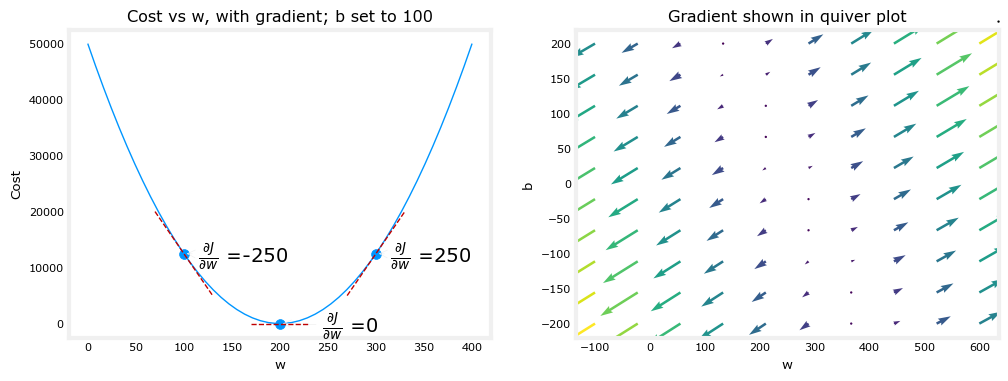

In [5]:
plt_gradients(x_train,y_train,compute_cost,compute_gradient)
plt.show()

In [30]:
#Gradient descent 
"""
Performs gradient descent to fit w,b. Updates w,b by taking 
num_iters gradient steps with learning rate alpha

Args:
x (ndarray (m,))  : Data, m examples 
y (ndarray (m,))  : target values
w_in,b_in (scalar): initial values of model parameters  
alpha (float):     Learning rate
num_iters (int):   number of iterations to run gradient descent
cost_function:     function to call to produce cost
gradient_function: function to call to produce gradient

Returns:
w (scalar): Updated value of parameter after running gradient descent
b (scalar): Updated value of parameter after running gradient descent
J_history (List): History of cost values
p_history (list): History of parameters [w,b] 
"""
def gradient_descent(x,y,w_in, b_in, alpha, num_iters, cost_function, gradient_function):
   
    #an array to store cost J and w's at each iteration primarily for graphing later
    J_history=[]
    p_history=[]
    b=b_in
    w=w_in
    for i in range(num_iters):
      #calculate the gradient and update the parameters using gradient function 
      dj_dw, dj_db=gradient_function(x,y,w,b)
      
      #update parameters using equations (3)
      b=b-alpha*dj_db
      w=w-alpha*dj_dw

      #save cost J at each iteration 
      if i<100000: #prevent resource exhaustion 
           J_history.append(cost_function(x,y,w,b))
           p_history.append([w,b])
      #print cost every at intervals 10 times or as many iterations if <10:
      if i%math.ceil(num_iters/10)==0:
           print(f'Iteration {i:4}: Cost {J_history[-1]:0.2e}',
                 f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
           

    return w, b, J_history, p_history

In [31]:
#initializing paramters 
w_init=0
b_init=0
#some gradient descent settings
iterations=10000
tmp_alpha=1.0e-2
#run the gradient descent 
w_final, b_final, J_hist, p_hist=gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, 
                                                  compute_gradient)
print(f'(w,b) found by the gradient secent: {w_final: 8.4f}, {b_final: 8.4f}')

Iteration    0: Cost 7.93e+04 dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00 dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01 dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01 dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02 dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03 dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03 dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04 dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04 dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05 dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02
(w,b) foun

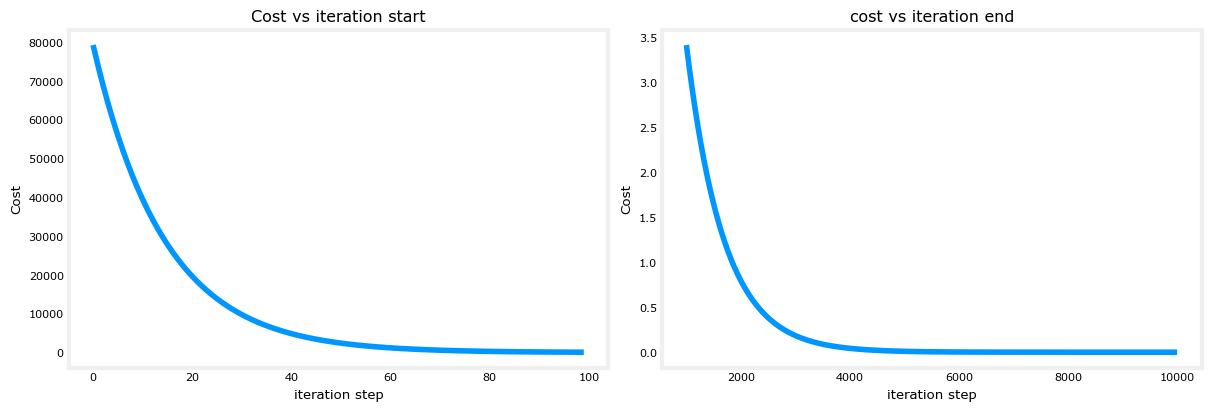

In [32]:
#plot cost versus iterations 
fig, (ax1, ax2)=plt.subplots(1,2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000+np.arange(len(J_hist[1000:])),J_hist[1000:])
ax1.set_title("Cost vs iteration start"); ax2.set_title("cost vs iteration end")
ax1.set_ylabel('Cost');  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step'); ax2.set_xlabel('iteration step')
plt.show()

In [33]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


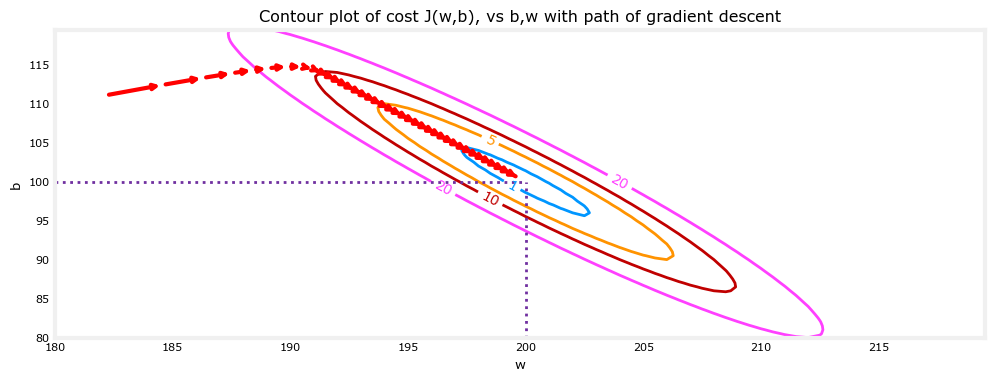

In [34]:
fig,ax=plt.subplots(1,1,figsize=(12,4))
plt_contour_wgrad(x_train,y_train,p_hist,ax, w_range=[180,220,0.5],b_range=[80,120,0.5],contours=[1,5,10,20],resolution=0.5)

In [45]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 7.93e+04 dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration    1: Cost 7.39e+04 dj_dw: -6.278e+02, dj_db: -3.862e+02   w:  1.278e+01, b: 7.86250e+00
Iteration    2: Cost 6.90e+04 dj_dw: -6.063e+02, dj_db: -3.730e+02   w:  1.884e+01, b: 1.15922e+01
Iteration    3: Cost 6.43e+04 dj_dw: -5.855e+02, dj_db: -3.601e+02   w:  2.470e+01, b: 1.51937e+01
Iteration    4: Cost 6.00e+04 dj_dw: -5.655e+02, dj_db: -3.478e+02   w:  3.035e+01, b: 1.86713e+01
Iteration    5: Cost 5.59e+04 dj_dw: -5.461e+02, dj_db: -3.358e+02   w:  3.581e+01, b: 2.20294e+01
Iteration    6: Cost 5.22e+04 dj_dw: -5.274e+02, dj_db: -3.243e+02   w:  4.109e+01, b: 2.52719e+01
Iteration    7: Cost 4.87e+04 dj_dw: -5.094e+02, dj_db: -3.131e+02   w:  4.618e+01, b: 2.84029e+01
Iteration    8: Cost 4.54e+04 dj_dw: -4.919e+02, dj_db: -3.023e+02   w:  5.110e+01, b: 3.14262e+01
Iteration    9: Cost 4.23e+04 dj_dw: -4.751e+02, dj_db: -2.919e+02   w:  5.585e+01, b: 3.43454e+01
